In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [2]:
%matplotlib inline

In [3]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/2d_spin_glass.pkl")
res_ex = load_pickle_zip("../models/solutions/2d_spin_glass.pkl")

In [4]:
betas = res_ex["betas"]

In [5]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=1000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -6.983 std_fe: 1.37E-02 M: 0.009 S: 0.687 E: -0.109: 0.0309, B1 = -0.001
fe: -3.568 std_fe: 2.58E-02 M: 0.007 S: 0.673 E: -0.201: 0.0325, B1 = -0.001
fe: -2.461 std_fe: 3.56E-02 M: 0.011 S: 0.652 E: -0.287: 0.0217, B1 = 0.007
fe: -1.927 std_fe: 4.37E-02 M: 0.010 S: 0.624 E: -0.366: 0.0236, B1 = 0.004
fe: -1.622 std_fe: 4.84E-02 M: 0.010 S: 0.592 E: -0.439: 0.0165, B1 = -0.007
fe: -1.431 std_fe: 5.14E-02 M: 0.008 S: 0.554 E: -0.507: 0.0197, B1 = 0.018
fe: -1.305 std_fe: 5.10E-02 M: 0.006 S: 0.501 E: -0.589: 0.0216, B1 = 0.006
fe: -1.220 std_fe: 4.77E-02 M: 0.008 S: 0.444 E: -0.665: 0.0184, B1 = -0.009
fe: -1.163 std_fe: 4.34E-02 M: 0.005 S: 0.386 E: -0.734: 0.042, B1 = 0.00214
fe: -1.124 std_fe: 3.80E-02 M: 0.006 S: 0.323 E: -0.800: 0.0401, B1 = -0.000
fe: -1.096 std_fe: 3.24E-02 M: 0.010 S: 0.270 E: -0.850: 0.0162, B1 = -0.001
fe: -1.077 std_fe: 2.81E-02 M: 0.007 S: 0.233 E: -0.883: 0.012, B1 = -0.0091
fe: -1.063 std_fe: 2.55E-02 M: 0.009 S: 0.204 E: -0.907: 0.0337, B1 = 0.0001
fe:

In [6]:
res_nn_z2 = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -6.983 std_fe: 1.19E-02 M: 0.011 S: 0.688 E: -0.107: 0.0309, B1 = -0.017
fe: -3.569 std_fe: 1.97E-02 M: 0.007 S: 0.674 E: -0.199: 0.0246, B1 = 0.045
fe: -2.461 std_fe: 2.79E-02 M: 0.007 S: 0.651 E: -0.290: 0.0168, B1 = 0.134
fe: -1.929 std_fe: 3.44E-02 M: 0.008 S: 0.623 E: -0.371: 0.0131, B1 = 0.184
fe: -1.625 std_fe: 3.88E-02 M: 0.009 S: 0.589 E: -0.447: 0.033, B1 = 0.035
fe: -1.436 std_fe: 3.98E-02 M: 0.010 S: 0.546 E: -0.525: 0.0121, B1 = -0.072
fe: -1.311 std_fe: 3.94E-02 M: 0.007 S: 0.498 E: -0.599: 0.0239, B1 = -0.141
fe: -1.226 std_fe: 3.56E-02 M: 0.007 S: 0.440 E: -0.677: 0.0246, B1 = -0.282
fe: -1.169 std_fe: 3.04E-02 M: 0.004 S: 0.382 E: -0.745: 0.0202, B1 = -0.391
fe: -1.131 std_fe: 2.37E-02 M: 0.012 S: 0.323 E: -0.807: 0.0286, B1 = -0.487
fe: -1.103 std_fe: 1.86E-02 M: 0.010 S: 0.275 E: -0.853: 0.043, B1 = -0.5713
fe: -1.084 std_fe: 1.40E-02 M: 0.021 S: 0.242 E: -0.882: 0.0333, B1 = -0.646
fe: -1.069 std_fe: 1.04E-02 M: 0.014 S: 0.210 E: -0.907: 0.00937, B1 = -0.773
fe:

In [7]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = False, x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -6.984 std_fe: 1.55E-05 M: -0.013 S: 0.688 E: -0.104 0.026, B1 = -0.002
fe: -3.569 std_fe: 2.96E-05 M: 0.020 S: 0.673 E: -0.206: 0.0283, B1 = -0.001
fe: -2.464 std_fe: 4.29E-05 M: -0.071 S: 0.650 E: -0.298 0.028, B1 = 0.0020
fe: -1.933 std_fe: 5.69E-05 M: 0.019 S: 0.621 E: -0.382: 0.0235, B1 = 0.004
fe: -1.632 std_fe: 6.86E-05 M: 0.018 S: 0.585 E: -0.463: 0.0201, B1 = -0.008
fe: -1.444 std_fe: 7.94E-05 M: 0.051 S: 0.542 E: -0.541: 0.0284, B1 = 0.005
fe: -1.320 std_fe: 9.82E-05 M: -0.009 S: 0.499 E: -0.608 0.0231, B1 = -0.010
fe: -1.236 std_fe: 1.23E-04 M: -0.032 S: 0.444 E: -0.681 0.0153, B1 = -0.021
fe: -1.177 std_fe: 1.34E-04 M: 0.084 S: 0.388 E: -0.746: 0.0107, B1 = -0.009
fe: -1.138 std_fe: 1.71E-04 M: -0.043 S: 0.347 E: -0.791 0.0205, B1 = -0.003
fe: -1.110 std_fe: 3.58E-04 M: 0.161 S: 0.310 E: -0.828: 0.0225, B1 = -0.015
fe: -1.086 std_fe: 1.53E-04 M: -0.064 S: 0.258 E: -0.872 0.0122, B1 = 0.0148
fe: -1.070 std_fe: 9.01E-05 M: -0.030 S: 0.214 E: -0.906 0.027, B1 = 0.00667
fe:

In [8]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -6.984, ener: -0.104, M: 0.000, iter 7
fe: -3.570, ener: -0.207, M: 0.000, iter 9
fe: -2.465, ener: -0.306, M: 0.000, iter 10
fe: -1.937, ener: -0.399, M: 0.000, iter 13
fe: -1.638, ener: -0.486, M: 0.000, iter 18
fe: -1.453, ener: -0.566, M: 0.000, iter 22
fe: -1.332, ener: -0.638, M: 0.000, iter 31
fe: -1.249, ener: -0.704, M: 0.000, iter 42
fe: -1.192, ener: -0.762, M: 0.000, iter 62
fe: -1.152, ener: -0.814, M: 0.000, iter 336
fe: -1.124, ener: -0.859, M: 0.274, iter 1000
fe: -1.104, ener: -0.884, M: 0.440, iter 1000
fe: -1.100, ener: -0.892, M: 0.488, iter 1000
fe: -1.096, ener: -0.895, M: 0.513, iter 1000
fe: -1.093, ener: -0.895, M: 0.528, iter 1000
fe: -1.091, ener: -0.894, M: 0.542, iter 1000
fe: -1.089, ener: -0.892, M: 0.554, iter 1000
fe: -1.088, ener: -0.890, M: 0.566, iter 1000
fe: -1.087, ener: -0.888, M: 0.578, iter 1000


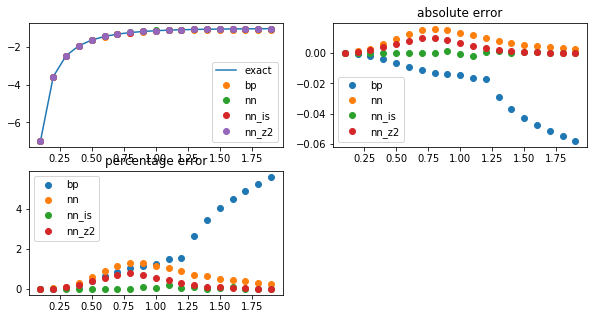

In [9]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is, res_nn_z2], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

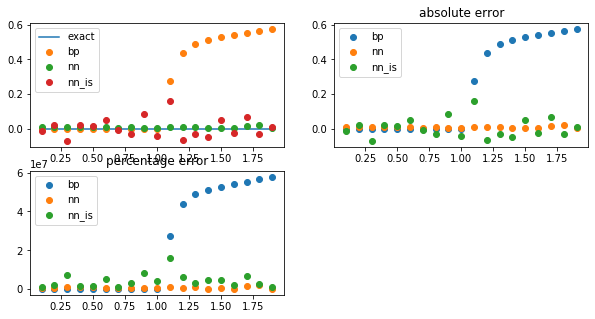

In [10]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is])
plt.show()

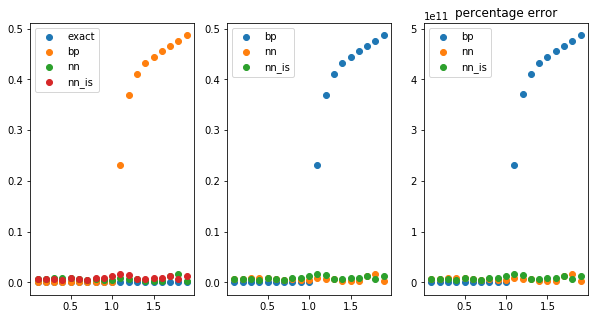

In [11]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.show()

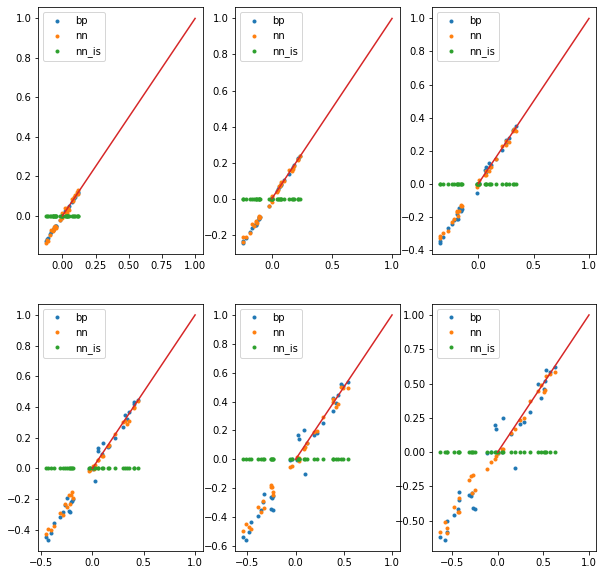

In [12]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()